<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Tensorflow-for-Deep-Learning-Udacity/blob/main/Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [2]:
print('Current working directory: ',os.getcwd())

Current working directory:  /content


## Setup Dataset Path 

In [3]:
'''
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')
sky_building=glob.glob('dataset_building/sky_building/*.*')
mud_house=glob.glob('dataset_building/mud_house/*.*')
'''


"\nbuilding_house=glob.glob('dataset_building/building_house/*.*')\nmosque=glob.glob('dataset_building/mosque/*.*')\ntemple=glob.glob('dataset_building/temple/*.*')\ntinshed=glob.glob('dataset_building/tinshed/*.*')\nsky_building=glob.glob('dataset_building/sky_building/*.*')\nmud_house=glob.glob('dataset_building/mud_house/*.*')\n"

In [4]:
''' 
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('Sky building data: ',len(sky_building))
print('Mud house data: ',len(mud_house))
'''


" \nprint('Building house data : ',len(building_house))\nprint('Mosque data: ',len(mosque))\nprint('Temple data: ',len(temple))\nprint('Tinshed data: ',len(tinshed))\nprint('Sky building data: ',len(sky_building))\nprint('Mud house data: ',len(mud_house))\n"

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/train'
test_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/test'
print(os.listdir(train_path))
print(os.listdir(test_path))

['building_house', 'mosque', 'temple', 'tinshed', 'mud_house', 'sky_building']
['mud_house', 'building_house', 'mosque', 'sky_building', 'temple', 'tinshed']


## Dataset Preprocssing using ImageDataGenerator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
WIDTH=224
HEIGHT=224

In [9]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    shear_range=0.1 ,
                                    zoom_range=0.1,
                                    rotation_range=20,
                                    height_shift_range=0.1,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [10]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [11]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [12]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [13]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

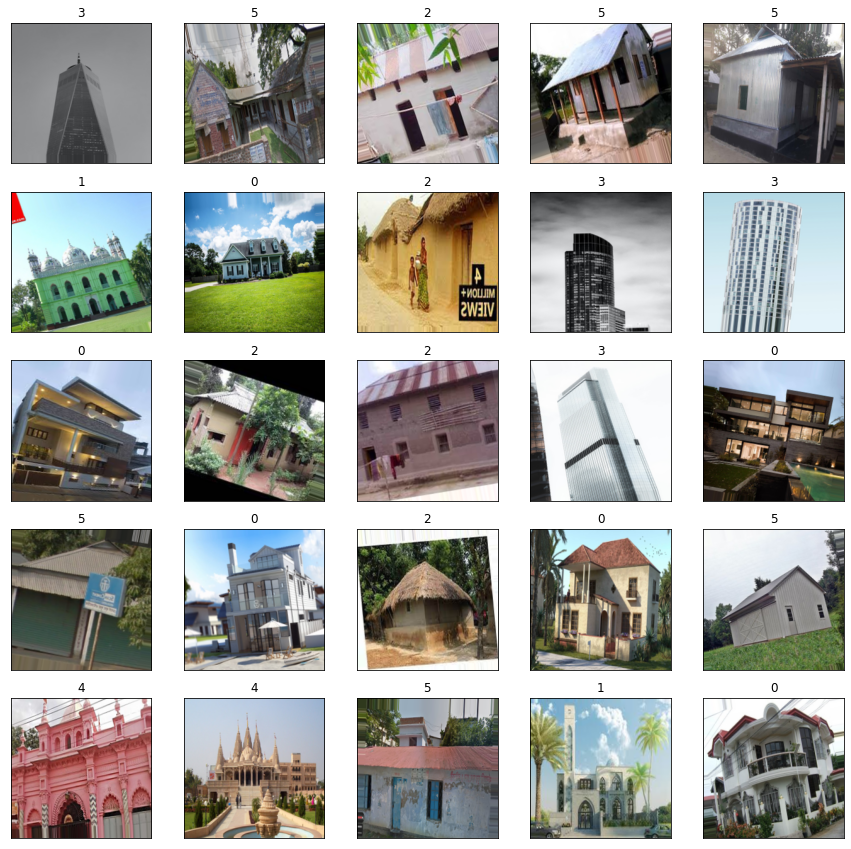

In [14]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

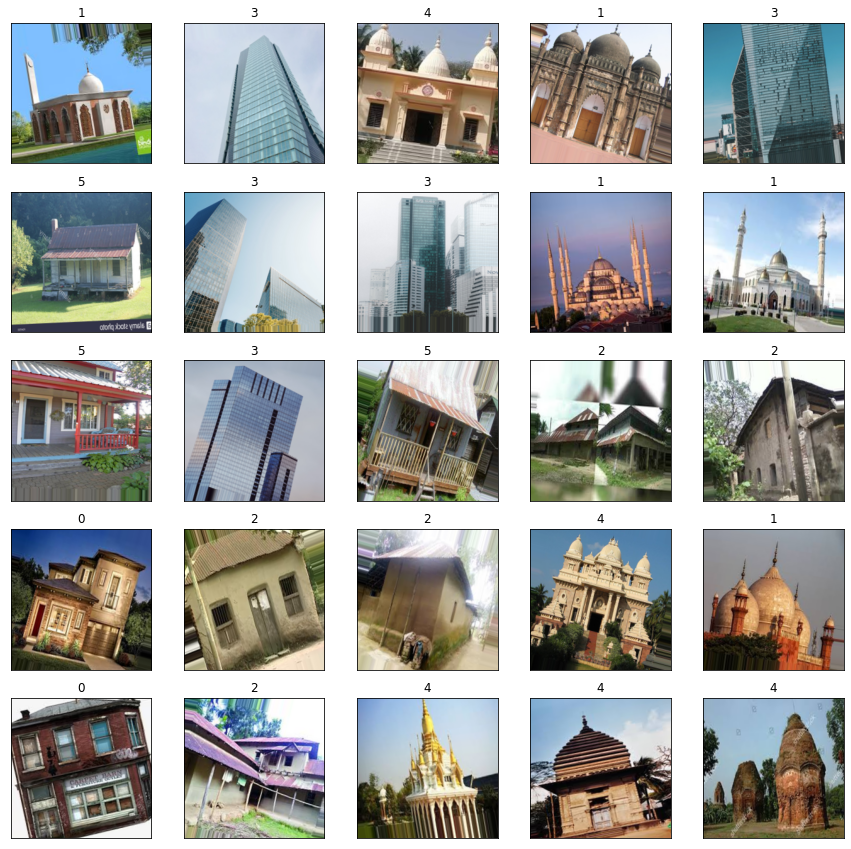

In [15]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Define Convolutional Neural Network Architecture

In [16]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

In [17]:
model=Sequential()
model.add(Conv2D(filters=256,kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(total_class,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        1

## Compile CNN Model

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Trained  CNN Model

In [20]:
epochs=200
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [21]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5', verbose=1 ,save_best_only=True)

In [22]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps,callbacks=[checkpointer])

Epoch 1/200
30/30 [==============================] - 410s 13s/step - loss: 1.7687 - accuracy: 0.2593 - val_loss: 2.0854 - val_accuracy: 0.2009

Epoch 00001: val_loss improved from inf to 2.08540, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5
Epoch 2/200
30/30 [==============================] - 17s 578ms/step - loss: 1.3587 - accuracy: 0.4653 - val_loss: 3.1751 - val_accuracy: 0.2679

Epoch 00002: val_loss did not improve from 2.08540
Epoch 3/200
30/30 [==============================] - 17s 564ms/step - loss: 1.1624 - accuracy: 0.5525 - val_loss: 1.5142 - val_accuracy: 0.4107

Epoch 00003: val_loss improved from 2.08540 to 1.51416, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5
Epoch 4/200
30/30 [==============================] - 17s 576ms/step - loss: 1.0620 - accuracy: 0.5777 - val_loss: 2.4173 - val_accuracy: 0.2321

Epoch 00004: val_loss did not improve from 1.514

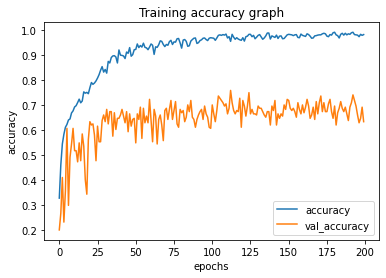

In [23]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

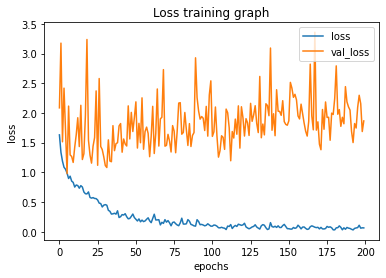

In [24]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Testing the model

In [25]:
test_loss,test_accuracy=model.evaluate(validation_dataset)

8/8 [==============================] - 5s 583ms/step - loss: 1.9383 - accuracy: 0.6458


In [26]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  64.58333134651184


## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [27]:
import time
t = time.time()
export_path_keras = "/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/CNN_model{}_time_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/CNN_model0.6458333134651184_time_1619758893.h5


## Reload the model h5 format

In [28]:
from tensorflow.keras.models import load_model

In [29]:
reload_model=load_model(export_path_keras)
reload_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        1

## Check Random Image

In [30]:
image_batch,label_batch=next(iter(validation_dataset))

In [31]:
label_batch[:5]

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

## Classification report 

In [32]:
predicted_result=model.predict(validation_dataset)
predicted_result[:5]

array([[6.1514766e-06, 1.7804107e-08, 9.9963105e-01, 1.5890444e-04,
        9.6355461e-06, 1.9430295e-04],
       [2.9618610e-02, 2.4638716e-02, 3.8729765e-02, 5.8923446e-02,
        8.3560127e-01, 1.2488197e-02],
       [2.1273693e-02, 3.2571205e-01, 3.1606932e-03, 3.8811048e-03,
        6.3523042e-01, 1.0742053e-02],
       [9.9978620e-01, 3.9429691e-05, 1.0148680e-08, 2.0122116e-10,
        1.7018599e-04, 4.1517906e-06],
       [3.2758931e-06, 2.1945617e-08, 8.0492085e-11, 9.9999666e-01,
        1.2394616e-10, 1.5355914e-11]], dtype=float32)

In [33]:
predicted_value=np.argmax(model.predict(validation_dataset),axis=-1)
predicted_value

array([5, 3, 0, 3, 0, 2, 5, 1, 0, 2, 3, 2, 4, 0, 2, 2, 3, 4, 2, 4, 3, 2,
       2, 5, 1, 4, 5, 0, 0, 5, 2, 2, 2, 0, 3, 5, 4, 1, 4, 0, 3, 2, 4, 4,
       2, 5, 0, 5, 1, 2, 5, 0, 2, 3, 1, 5, 1, 5, 2, 3, 4, 3, 3, 1, 5, 5,
       2, 2, 2, 0, 4, 1, 4, 2, 2, 3, 2, 1, 3, 3, 4, 3, 4, 4, 5, 3, 3, 4,
       3, 1, 2, 5, 2, 4, 3, 5, 2, 1, 5, 2, 2, 4, 4, 3, 3, 0, 2, 4, 2, 0,
       2, 5, 4, 1, 2, 2, 0, 4, 2, 2, 1, 4, 2, 2, 2, 1, 0, 5, 1, 0, 0, 5,
       3, 5, 0, 0, 0, 5, 1, 2, 2, 1, 1, 1, 1, 4, 2, 3, 1, 3, 3, 5, 3, 3,
       3, 3, 2, 2, 3, 1, 0, 2, 3, 5, 2, 5, 2, 5, 3, 5, 5, 3, 0, 0, 5, 5,
       1, 5, 2, 0, 2, 3, 3, 2, 5, 0, 0, 2, 2, 4, 1, 1, 1, 4, 3, 5, 4, 2,
       3, 1, 1, 4, 4, 2, 5, 0, 1, 2, 5, 2, 4, 2, 2, 2, 0, 2, 5, 0, 3, 3,
       1, 4, 0, 2, 3, 3, 5, 2, 2, 4, 2, 5, 2, 0, 3, 2, 0, 5, 5, 4])

In [ ]:
validation_value=validation_dataset.classes
validation_value

In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(validation_dataset.classes,predicted_value))

Accuracy score:  0.1875


In [36]:
from sklearn.metrics import classification_report
print('classification report \n',classification_report(validation_dataset.classes,predicted_value))

classification report 
               precision    recall  f1-score   support

           0       0.25      0.20      0.22        40
           1       0.20      0.15      0.17        40
           2       0.19      0.30      0.23        40
           3       0.21      0.23      0.22        40
           4       0.09      0.07      0.08        40
           5       0.17      0.17      0.17        40

    accuracy                           0.19       240
   macro avg       0.19      0.19      0.18       240
weighted avg       0.19      0.19      0.18       240



## Another approach to calculate the classification report

In [37]:
predicted_array=model.predict(validation_dataset)
predicted_array

array([[6.8414471e-07, 6.3218999e-07, 1.4669483e-07, 9.9995100e-01,
        2.1453675e-06, 4.5394940e-05],
       [2.0982154e-11, 2.9498568e-15, 7.7719227e-16, 1.0000000e+00,
        8.9658479e-18, 3.2044553e-17],
       [1.3975114e-02, 8.2589912e-01, 2.0285829e-03, 1.4339107e-02,
        1.4346638e-01, 2.9172713e-04],
       ...,
       [1.3930018e-05, 1.7565030e-07, 9.9901497e-01, 3.6447199e-09,
        1.3713550e-06, 9.6953003e-04],
       [3.6245139e-04, 1.7200571e-05, 4.6417808e-05, 6.1313493e-08,
        9.9952674e-01, 4.7193680e-05],
       [7.9815516e-07, 9.9993265e-01, 3.3379433e-10, 1.9462672e-05,
        4.7022495e-05, 2.4319883e-08]], dtype=float32)